<a href="https://colab.research.google.com/github/samieiyan/homepage/blob/master/Behrouz_Samieiyan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [2]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

Algerian forest fires  dataset is related to forest fires in Algeria . This data set contains 244 samples from two regions in Algeria. the Bejaia region is located in the northeast of Algeria and the Sidi Bel-abbes region is located in the northwest of Algeria.
This data set has ten features and one output. The output of this dataset consists of two classes(class 0 or Not fire and class1 or fire). The features are Temperature, Relative Humidity, Wind speed, Rain, Fine Fuel Moisture Code, Duff Moisture Code, Drought Code, Initial Spread Index, Buildup Index and Fire Weather Index, respectively.


Attribute Information:

1. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42,
2. RH : Relative Humidity in %: 21 to 90,
3. Ws :Wind speed in km/h: 6 to 29,
4. Rain: total day in mm: 0 to 16.8,
5. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5,
6. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
7. Drought Code (DC) index from the FWI system: 7 to 220.4,
8. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5,
9. Buildup Index (BUI) index from the FWI system: 1.1 to 68,
10. Fire Weather Index (FWI) Index: 0 to 31.1.


https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

In [6]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/samieiyan/homepage/master/Algerian_forest_fires_dataset_UPDATE.csv')
df.head(25)

Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI   BUI  FWI  class
0            29   57   18    0.0  65.7   3.4   7.6  1.3   3.4  0.5      0
1            29   61   13    1.3  64.4   4.1   7.6  1.0   3.9  0.4      0
2            26   82   22   13.1  47.1   2.5   7.1  0.3   2.7  0.1      0
3            25   89   13    2.5  28.6   1.3   6.9  0.0   1.7  0.0      0
4            27   77   16    0.0  64.8   3.0  14.2  1.2   3.9  0.5      0
5            31   67   14    0.0  82.6   5.8  22.2  3.1   7.0  2.5      1
6            33   54   13    0.0  88.2   9.9  30.5  6.4  10.9  7.2      1
7            30   73   15    0.0  86.6  12.1  38.3  5.6  13.5  7.1      1
8            25   88   13    0.2  52.9   7.9  38.8  0.4  10.5  0.3      0
9            28   79   12    0.0  73.2   9.5  46.3  1.3  12.6  0.9      0
10           31   65   14    0.0  84.5  12.5  54.3  4.0  15.8  5.6      1
11           26   81   19    0.0  84.0  13.8  61.4  4.8  17.7  7.1      1
12           27   84   21    1.2  50.0   6.7  17.0  0.5   6.7  0.2      0
13           30   78   20    0.5  59.0   4.6   7.8  1.0   4.4  0.4      0
14           28   80   17    3.1  49.4   3.0   7.4  0.4   3.0  0.1      0
15           29   89   13    0.7  36.1   1.7   7.6  0.0   2.2  0.0      0
16           30   89   16    0.6  37.3   1.1   7.8  0.0   1.6  0.0      0
17           31   78   14    0.3  56.9   1.9   8.0  0.7   2.4  0.2      0
18           31   55   16    0.1  79.9   4.5  16.0  2.5   5.3  1.4      0
19           30   80   16    0.4  59.8   3.4  27.1  0.9   5.1  0.4      0
20           30   78   14    0.0  81.0   6.3  31.6  2.6   8.4  2.2      1
21           31   67   17    0.1  79.1   7.0  39.5  2.4   9.7  2.3      0
22           32   62   18    0.1  81.4   8.2  47.7  3.3  11.5  3.8      1
23           32   66   17    0.0  85.9  11.2  55.8  5.6  14.9  7.5      1
24           31   64   15    0.0  86.7  14.2  63.8  5.7  18.3  8.4      1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1    RH          243 non-null    int64  
 2    Ws          243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  class        243 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 21.0 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

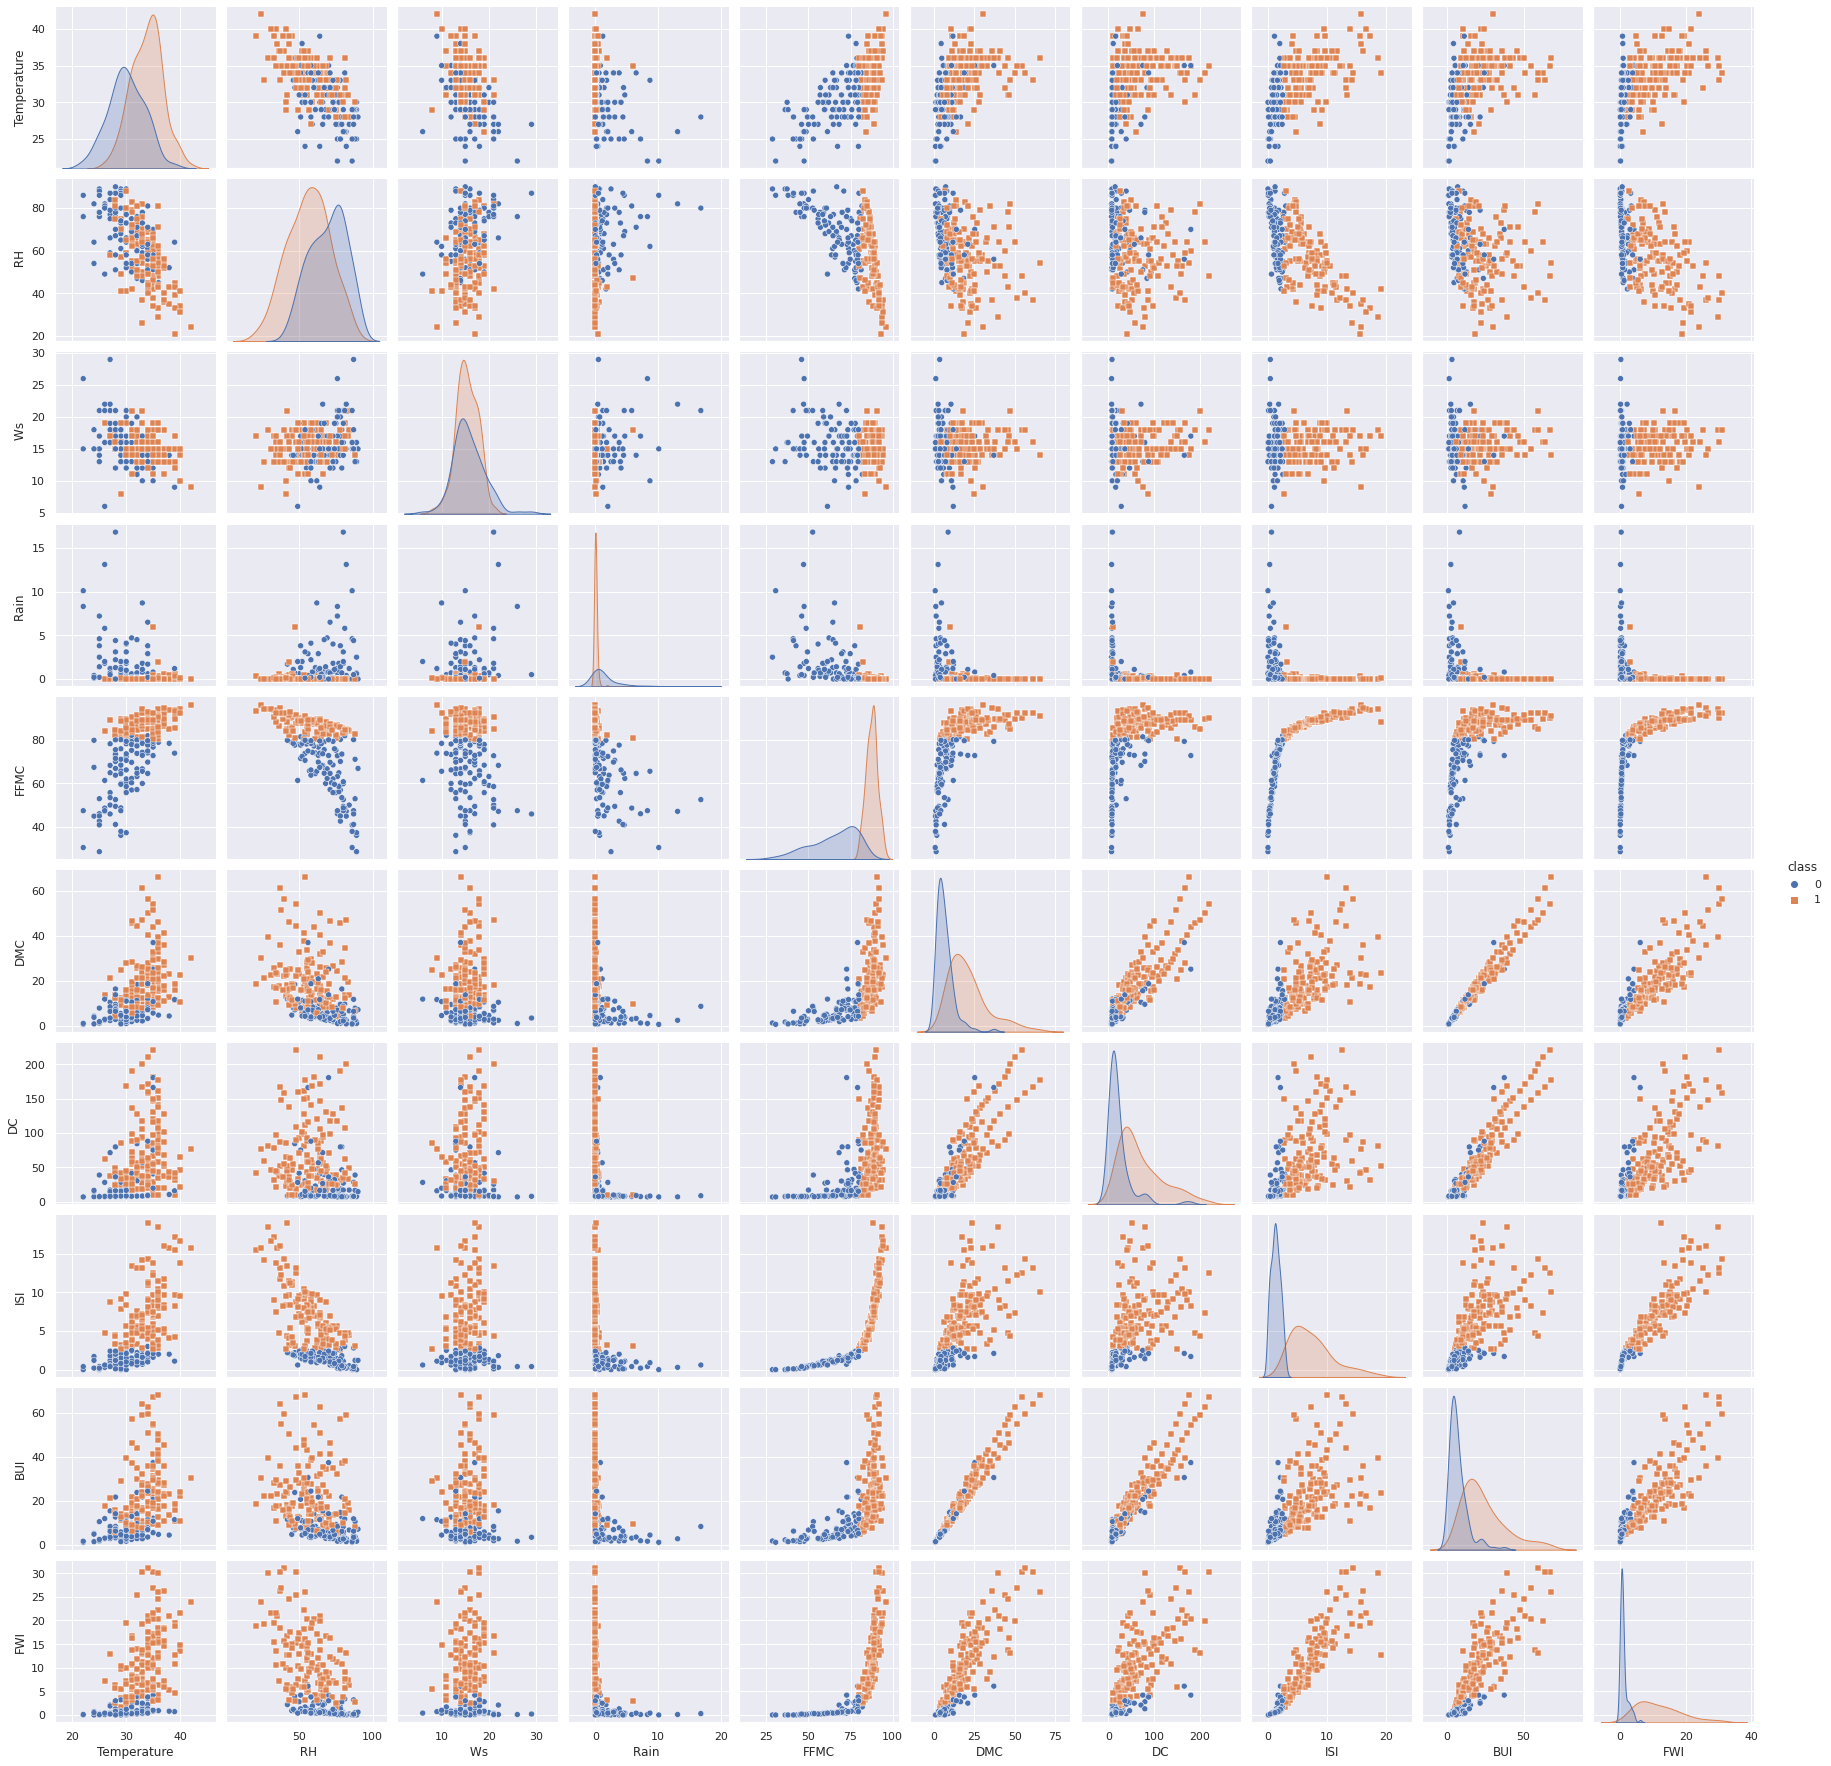

In [10]:
sns.pairplot(df, hue='class', markers=["o", "s"])
plt.show()

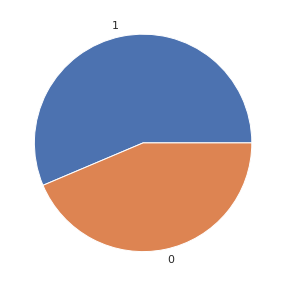

In [11]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [12]:
X = df.drop(columns=['class'])
X.head(10)

Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI   BUI  FWI
0           29   57   18    0.0  65.7   3.4   7.6  1.3   3.4  0.5
1           29   61   13    1.3  64.4   4.1   7.6  1.0   3.9  0.4
2           26   82   22   13.1  47.1   2.5   7.1  0.3   2.7  0.1
3           25   89   13    2.5  28.6   1.3   6.9  0.0   1.7  0.0
4           27   77   16    0.0  64.8   3.0  14.2  1.2   3.9  0.5
5           31   67   14    0.0  82.6   5.8  22.2  3.1   7.0  2.5
6           33   54   13    0.0  88.2   9.9  30.5  6.4  10.9  7.2
7           30   73   15    0.0  86.6  12.1  38.3  5.6  13.5  7.1
8           25   88   13    0.2  52.9   7.9  38.8  0.4  10.5  0.3
9           28   79   12    0.0  73.2   9.5  46.3  1.3  12.6  0.9

In [13]:
X.describe().transpose()

count       mean        std   min    25%   50%    75%    max
Temperature  243.0  32.152263   3.628039  22.0  30.00  32.0  35.00   42.0
 RH          243.0  62.041152  14.828160  21.0  52.50  63.0  73.50   90.0
 Ws          243.0  15.493827   2.811385   6.0  14.00  15.0  17.00   29.0
Rain         243.0   0.762963   2.003207   0.0   0.00   0.0   0.50   16.8
FFMC         243.0  77.842387  14.349641  28.6  71.85  83.3  88.30   96.0
DMC          243.0  14.680658  12.393040   0.7   5.80  11.3  20.80   65.9
DC           243.0  49.430864  47.665606   6.9  12.35  33.1  69.10  220.4
ISI          243.0   4.742387   4.154234   0.0   1.40   3.5   7.25   19.0
BUI          243.0  16.690535  14.228421   1.1   6.00  12.4  22.65   68.0
FWI          243.0   7.035391   7.440568   0.0   0.70   4.2  11.45   31.1

**Standardize the Data**

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature        RH        Ws     Rain       FFMC       DMC        DC  \
0    -0.870655 -0.340673  0.893277 -0.381657 -0.847927 -0.912120 -0.879401   
1    -0.870655 -0.070359 -0.888877  0.268642 -0.938709 -0.855520 -0.879401   
2    -1.699254  1.348788  2.319000  6.171355 -2.146802 -0.984891 -0.889913   
3    -1.975454  1.821837 -0.888877  0.868918 -3.438694 -1.081920 -0.894117   
4    -1.423054  1.010896  0.180416 -0.381657 -0.910776 -0.944463 -0.740651   
5    -0.318255  0.335111 -0.532446 -0.381657  0.332234 -0.718063 -0.572469   
6     0.234145 -0.543409 -0.888877 -0.381657  0.723293 -0.386550 -0.397980   
7    -0.594455  0.740582 -0.176015 -0.381657  0.611562 -0.208664 -0.234002   
8    -1.975454  1.754259 -0.888877 -0.281611 -1.741776 -0.548264 -0.223490   
9    -1.146855  1.146053 -1.245307 -0.381657 -0.324187 -0.418892 -0.065819   

        ISI       BUI       FWI  
0 -0.830356 -0.936012 -0.880159  
1 -0.902720 -0.900798 -0.893626  
2 -1.071571 -0.985310 -0.934029  
3 -1.143935 -1.055737 -0.947497  
4 -0.854477 -0.900798 -0.880159  
5 -0.396169 -0.682475 -0.610807  
6  0.399841 -0.407810  0.022169  
7  0.206869 -0.224700  0.008701  
8 -1.047449 -0.435980 -0.907094  
9 -0.830356 -0.288084 -0.826288

In [15]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Temperature  243.0 -7.017706e-16  1.002064 -2.804054 -0.594455 -0.042055   
 RH          243.0  1.621931e-16  1.002064 -2.773497 -0.644776  0.064797   
 Ws          243.0 -2.226157e-16  1.002064 -3.383891 -0.532446 -0.176015   
Rain         243.0 -1.023415e-16  1.002064 -0.381657 -0.381657 -0.381657   
FFMC         243.0  1.204341e-15  1.002064 -3.438694 -0.418460  0.381116   
DMC          243.0 -1.105654e-16  1.002064 -1.130434 -0.718063 -0.273350   
DC           243.0  2.924044e-17  1.002064 -0.894117 -0.779543 -0.343320   
ISI          243.0 -1.101085e-16  1.002064 -1.143935 -0.806234 -0.299682   
BUI          243.0 -7.355799e-17  1.002064 -1.097993 -0.752902 -0.302169   
FWI          243.0 -8.041121e-17  1.002064 -0.947497 -0.853223 -0.381858   

                  75%       max  
Temperature  0.786544  2.719943  
 RH          0.774371  1.889415  
 Ws          0.536846  4.814014  
Rain        -0.131542  8.022206  
FFMC         0.730276  1.267982  
DMC          0.494792  4.141442  
DC           0.413500  3.594248  
ISI          0.604874  3.439152  
BUI          0.419707  3.613568  
FWI          0.594541  3.240919

**Observations and variables**

In [16]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

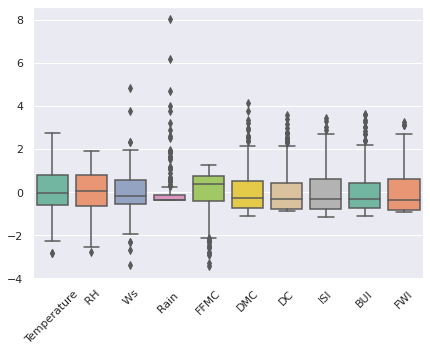

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

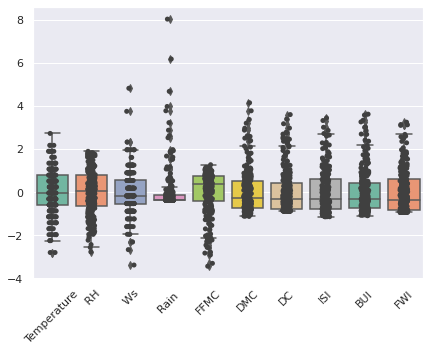

In [18]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

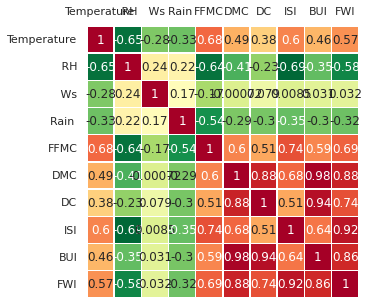

In [19]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

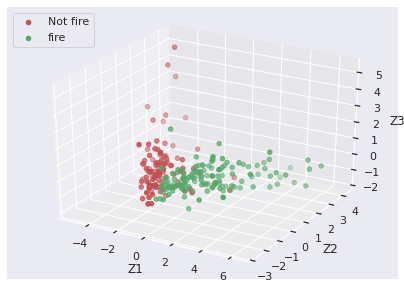

In [20]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Not fire)->0,  2(Fire)->1
idx_Notfire = np.where(y == 0)
idx_Fire = np.where(y == 1)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(Z[idx_Notfire,0], Z[idx_Notfire,1],Z[idx_Notfire,2], c='r', label='Not fire')
ax.scatter(Z[idx_Fire,0], Z[idx_Fire,1],Z[idx_Fire,2], c='g', label='fire')

ax.legend()
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')

ax.legend(loc='upper left')

**Eigenvectors**

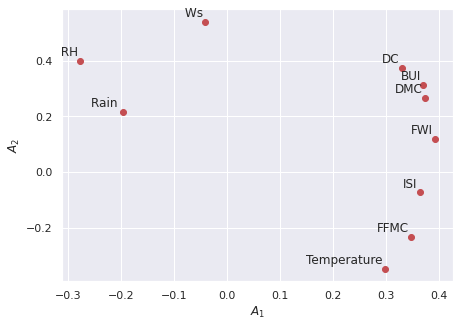

In [21]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

In [22]:
A

array([[ 0.2983451 , -0.34819133,  0.11683068,  0.09763951, -0.78642607,
        -0.3421434 , -0.17501209,  0.01915145, -0.00616139, -0.0028418 ],
       [-0.277016  ,  0.39876628, -0.42130133, -0.01854591, -0.16386457,
        -0.62692278,  0.40684678,  0.02547221,  0.01503778,  0.01121549],
       [-0.04037637,  0.53915323,  0.42002406, -0.64002989, -0.30440018,
         0.12467593, -0.0852877 ,  0.0779881 , -0.00790818,  0.00168689],
       [-0.19606535,  0.21525723,  0.64608294,  0.60784367, -0.082609  ,
         0.01476637,  0.34463394, -0.04981366,  0.00283135,  0.00462001],
       [ 0.3484669 , -0.23218813, -0.04129858, -0.23848881, -0.10514917,
         0.28866113,  0.81257012,  0.05825645, -0.08653437,  0.02330666],
       [ 0.37431571,  0.26629772, -0.08926312,  0.21324914,  0.04660647,
         0.04124032, -0.06950813,  0.63714935,  0.24273124,  0.51180867],
       [ 0.32989522,  0.37434607, -0.24948468,  0.17974394, -0.16845864,
         0.24356814, -0.05155166, -0.69912419

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


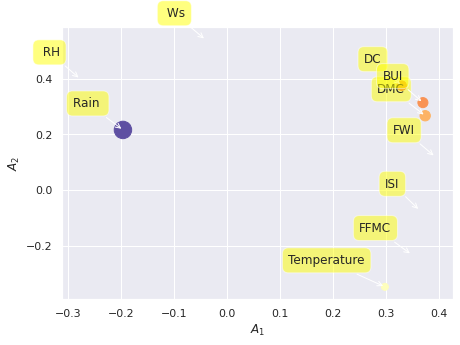

In [23]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

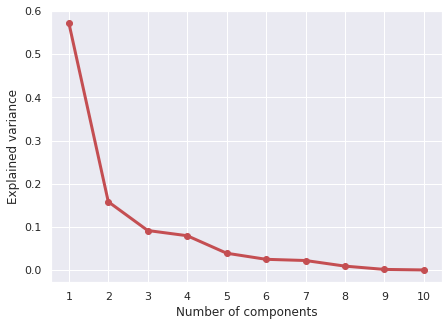

In [24]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

In [25]:
Lambda

array([5.75052057e+00, 1.58982968e+00, 9.20938529e-01, 7.99815503e-01,
       3.92998011e-01, 2.51245157e-01, 2.23183265e-01, 9.27076220e-02,
       1.62219949e-02, 3.86197847e-03])

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

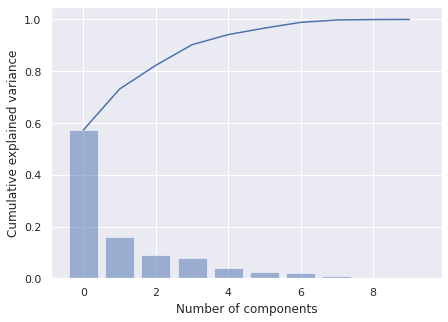

In [26]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

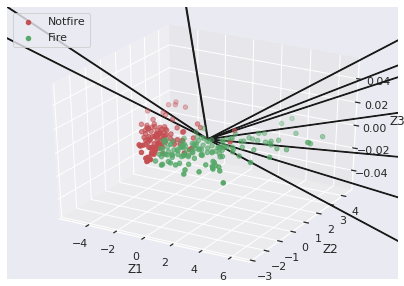

In [27]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
A3 = A[:,2]
Z1 = Z[:,0] 
Z2 = Z[:,1]
Z3 = Z[:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')

for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  ax.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  ax.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,A3[i]*max(Z3)*1.2,variables[i], color='k')

ax.scatter(Z[idx_Notfire,0], Z[idx_Notfire,1], c='r', label='Notfire')
ax.scatter(Z[idx_Fire,0], Z[idx_Fire,1], c='g', label='Fire')

ax.legend(loc='upper left')

##**Using PCA Library**

In [28]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=4dc65ea55ee52651e5293479e600fc94fe0de8eeb3c75e756ec91d7b31b45c6b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [29]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [30]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6
0   -2.048061 -0.145619  0.243349 -1.058268  0.164232  0.699271
1   -2.207526 -0.807806 -0.229999  0.527216  0.589829  0.334427
2   -4.716158  3.269965  4.253647  2.228598 -0.403700 -0.059166
3   -4.306025  0.938032 -0.702527  1.309184  1.253820 -1.086938
4   -2.542470  0.272066 -0.731763 -0.636334  0.566290 -0.019061
..        ...       ...       ...       ...       ...       ...
238  0.009070 -0.215110 -0.661165 -0.060188  0.553264  0.189724
239 -3.641274  1.200053  0.246995  1.458970  0.254525 -0.887062
240 -3.553392  3.359554  1.113895 -3.133233 -0.893818 -0.174818
241 -1.903105  0.150995  0.129993 -1.342175  1.193283  1.582695
242 -2.427086  0.054274 -0.577739 -0.418390  1.437217  0.843443

[243 rows x 6 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f37b4083750>)

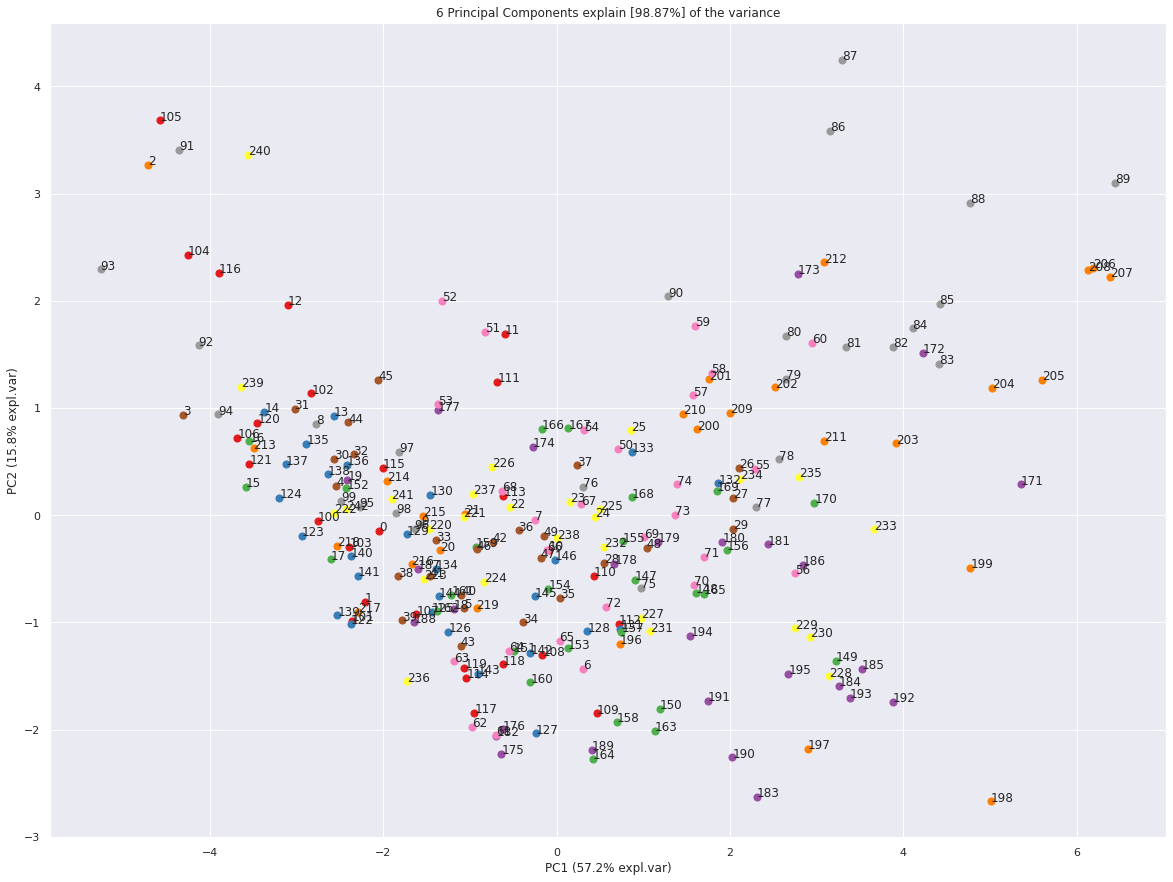

In [31]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [32]:
A = out['loadings'].T

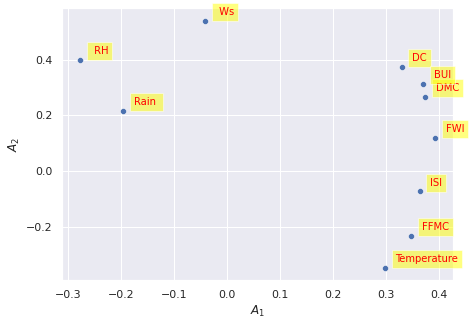

In [33]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

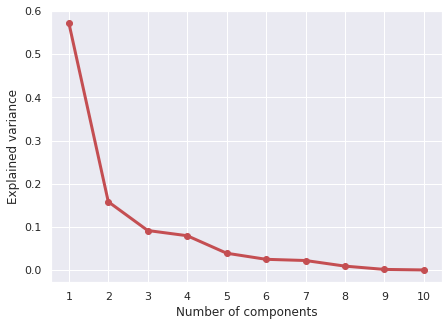

In [34]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

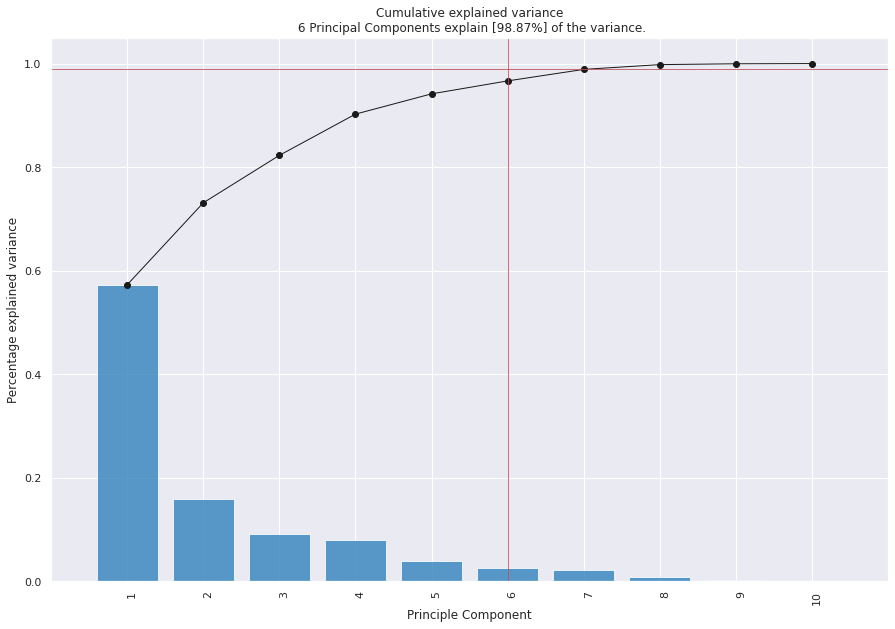

<Figure size 504x360 with 0 Axes>

In [35]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


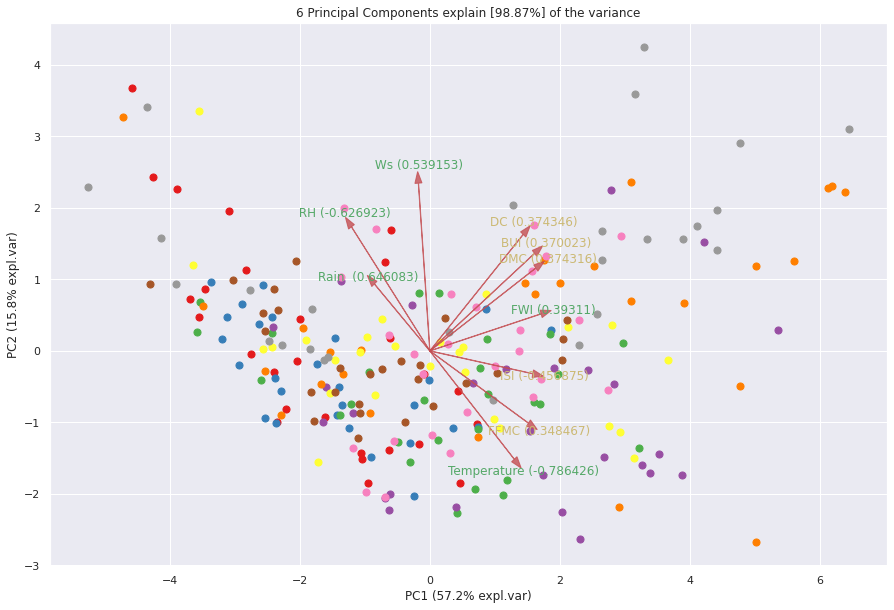

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f37b3ca8990>)

In [36]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


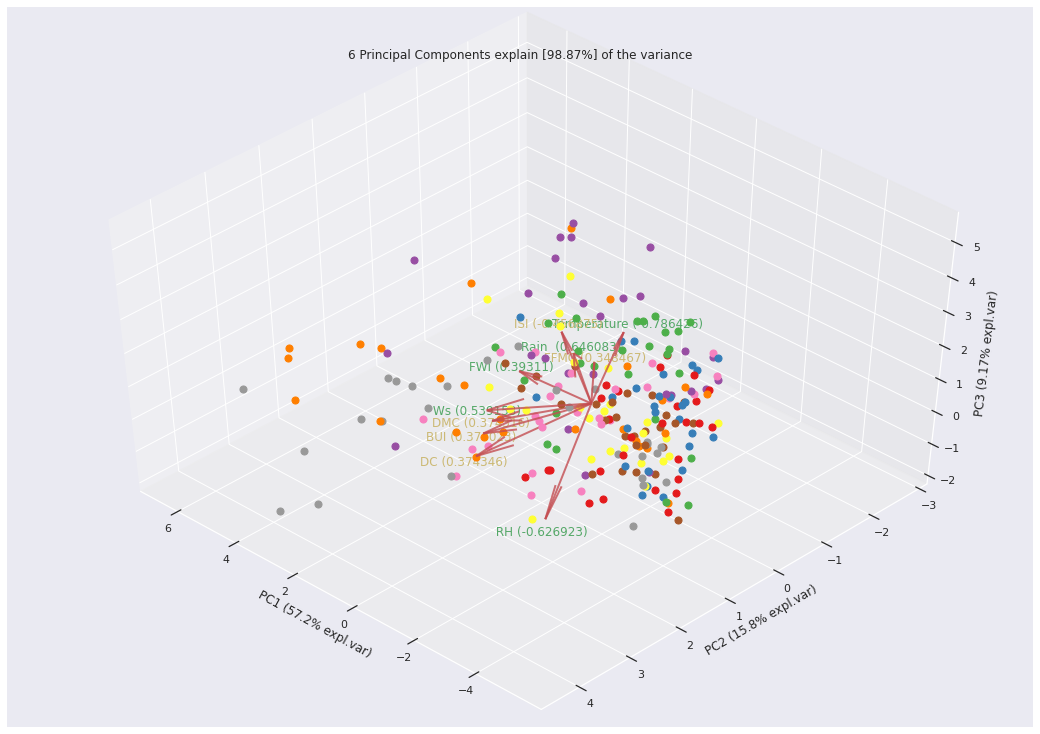

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f37b9330f50>)

In [37]:
model.biplot3d(label = False, legend = False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [38]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [39]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (219, 11)
Unseen Data For Predictions: (24, 11)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [40]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (219, 11)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 2
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (153, 43)
12                    Transformed Test Set          (66, 43)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f08c
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [41]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9804  0.9964  0.9875  0.9789   
rf               Random Forest Classifier    0.9733  0.9946  0.9625  0.9889   
lr                    Logistic Regression    0.9671  0.9964  0.9625  0.9789   
ada                  Ada Boost Classifier    0.9671  0.9920  0.9625  0.9775   
et                 Extra Trees Classifier    0.9671  0.9931  0.9750  0.9664   
gbc          Gradient Boosting Classifier    0.9604  0.9812  0.9625  0.9664   
dt               Decision Tree Classifier    0.9600  0.9607  0.9500  0.9750   
ridge                    Ridge Classifier    0.9217  0.0000  0.9292  0.9319   
knn                K Neighbors Classifier    0.9150  0.9697  0.9403  0.9128   
lda          Linear Discriminant Analysis    0.9150  0.9690  0.9167  0.9319   
svm                   SVM - Linear Kernel    0.8321  0.0000  0.7889  0.8199   
nb                            Naive Bayes    0.8038  0.9297  0.9750  0.7469   
qda       Quadratic Discriminant Analysis    0.5758  0.5717  0.6292  0.6090   
dummy                    Dummy Classifier    0.5421  0.5000  1.0000  0.5421   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.9822  0.9603  0.9626     0.066  
rf        0.9741  0.9467  0.9498     0.559  
lr        0.9689  0.9338  0.9376     0.422  
ada       0.9689  0.9338  0.9360     0.100  
et        0.9697  0.9335  0.9358     0.454  
gbc       0.9630  0.9202  0.9233     0.080  
dt        0.9617  0.9199  0.9214     0.015  
ridge     0.9278  0.8424  0.8477     0.014  
knn       0.9232  0.8282  0.8355     0.119  
lda       0.9211  0.8291  0.8352     0.016  
svm       0.7922  0.6746  0.6970     0.040  
nb        0.8439  0.5909  0.6379     0.015  
qda       0.6075  0.1435  0.1458     0.015  
dummy     0.7030  0.0000  0.0000     0.012

In [42]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [43]:
dt = create_model('dt')

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
5       0.9333  0.9375  0.8750  1.000  0.9333  0.8673  0.8750
6       1.0000  1.0000  1.0000  1.000  1.0000  1.0000  1.0000
7       0.8667  0.8661  0.8750  0.875  0.8750  0.7321  0.7321
8       0.9333  0.9375  0.8750  1.000  0.9333  0.8673  0.8750
9       0.8667  0.8661  0.8750  0.875  0.8750  0.7321  0.7321
Mean    0.9600  0.9607  0.9500  0.975  0.9617  0.9199  0.9214
SD      0.0533  0.0532  0.0612  0.050  0.0504  0.1070  0.1063

In [44]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [45]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9375  1.0000  1.0000  0.9000  0.9474  0.8710  0.8783
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9333  1.0000  0.8750  1.0000  0.9333  0.8673  0.8750
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  0.9911  0.8750  1.0000  0.9333  0.8673  0.8750
8       0.9333  1.0000  0.8750  1.0000  0.9333  0.8673  0.8750
9       0.8667  0.9286  0.8750  0.8750  0.8750  0.7321  0.7321
Mean    0.9604  0.9920  0.9500  0.9775  0.9622  0.9205  0.9235
SD      0.0440  0.0213  0.0612  0.0453  0.0418  0.0883  0.0866

In [46]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [48]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [49]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [50]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8750  0.9603  0.7778  1.0000  0.8750  0.7538  0.7778
1       0.9375  0.9683  1.0000  0.9000  0.9474  0.8710  0.8783
2       0.9375  0.9921  1.0000  0.9000  0.9474  0.8710  0.8783
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8667  1.0000  1.0000  0.8000  0.8889  0.7273  0.7559
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8667  0.9554  0.8750  0.8750  0.8750  0.7321  0.7321
8       0.8000  0.8482  0.8750  0.7778  0.8235  0.5946  0.6001
9       0.8667  0.9732  0.8750  0.8750  0.8750  0.7321  0.7321
Mean    0.9150  0.9697  0.9403  0.9128  0.9232  0.8282  0.8355
SD      0.0667  0.0439  0.0778  0.0803  0.0608  0.1345  0.1309

**Tune K Neighbors Model**

In [51]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8750  0.9444  0.7778  1.0000  0.8750  0.7538  0.7778
1       0.9375  0.9921  0.8889  1.0000  0.9412  0.8750  0.8819
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8667  0.9643  0.7500  1.0000  0.8571  0.7368  0.7638
8       0.8000  0.8393  0.7500  0.8571  0.8000  0.6018  0.6071
9       0.8667  0.9196  0.8750  0.8750  0.8750  0.7321  0.7321
Mean    0.9346  0.9660  0.9042  0.9732  0.9348  0.8700  0.8763
SD      0.0723  0.0501  0.1051  0.0537  0.0726  0.1438  0.1386

**Evaluate K Neighbors Model**

In [52]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [53]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9375  1.0000  1.0000  0.9000  0.9474  0.8710  0.8783
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9333  1.0000  0.8750  1.0000  0.9333  0.8673  0.8750
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  1.0000  0.8750  1.0000  0.9333  0.8673  0.8750
8       0.9333  0.9821  0.8750  1.0000  0.9333  0.8673  0.8750
9       0.9333  0.9821  1.0000  0.8889  0.9412  0.8649  0.8729
Mean    0.9671  0.9964  0.9625  0.9789  0.9689  0.9338  0.9376
SD      0.0329  0.0071  0.0573  0.0423  0.0314  0.0663  0.0624

**Tune Logistic Regression Model**

In [54]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
2       0.9375  1.0000   1.000  0.9000  0.9474  0.8710  0.8783
3       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
5       0.9333  1.0000   0.875  1.0000  0.9333  0.8673  0.8750
6       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
8       0.9333  1.0000   0.875  1.0000  0.9333  0.8673  0.8750
9       0.9333  0.9821   1.000  0.8889  0.9412  0.8649  0.8729
Mean    0.9738  0.9982   0.975  0.9789  0.9755  0.9470  0.9501
SD      0.0322  0.0054   0.050  0.0423  0.0302  0.0649  0.0611

**Evaluate Logistic Regression Model**

In [55]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [56]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9333  1.0000  0.8750  1.0000  0.9333  0.8673  0.8750
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  1.0000  0.8750  1.0000  0.9333  0.8673  0.8750
8       0.9333  0.9643  0.8750  1.0000  0.9333  0.8673  0.8750
9       0.9333  0.9821  1.0000  0.8889  0.9412  0.8649  0.8729
Mean    0.9733  0.9946  0.9625  0.9889  0.9741  0.9467  0.9498
SD      0.0327  0.0114  0.0573  0.0333  0.0318  0.0653  0.0615

**Tune Random Forest Model**

In [57]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9333  1.0000  0.8750  1.0000  0.9333  0.8673  0.8750
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  1.0000  0.8750  1.0000  0.9333  0.8673  0.8750
8       0.9333  0.9643  0.8750  1.0000  0.9333  0.8673  0.8750
9       0.9333  0.9821  1.0000  0.8889  0.9412  0.8649  0.8729
Mean    0.9733  0.9946  0.9625  0.9889  0.9741  0.9467  0.9498
SD      0.0327  0.0114  0.0573  0.0333  0.0318  0.0653  0.0615

**Evaluate Random Forest Model**

In [58]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [59]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
5       0.9333  1.0000   0.875  1.0000  0.9333  0.8673  0.8750
6       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000   1.000  1.0000  1.0000  1.0000  1.0000
8       0.9333  0.9821   0.875  1.0000  0.9333  0.8673  0.8750
9       0.9333  0.9821   1.000  0.8889  0.9412  0.8649  0.8729
Mean    0.9800  0.9964   0.975  0.9889  0.9808  0.9599  0.9623
SD      0.0306  0.0071   0.050  0.0333  0.0294  0.0612  0.0576

In [60]:
tuned_best_model

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [61]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [62]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (219, 11)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 2
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (153, 3)
12                    Transformed Test Set           (66, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              9f47
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [63]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9225  0.9651  0.9194  0.9456   
nb                            Naive Bayes    0.9158  0.9617  0.9069  0.9414   
knn                K Neighbors Classifier    0.9154  0.9693  0.9292  0.9242   
ridge                    Ridge Classifier    0.9096  0.0000  0.8833  0.9528   
lda          Linear Discriminant Analysis    0.9096  0.9671  0.8833  0.9528   
rf               Random Forest Classifier    0.9088  0.9371  0.9292  0.9142   
qda       Quadratic Discriminant Analysis    0.9021  0.9502  0.9528  0.8876   
svm                   SVM - Linear Kernel    0.8962  0.0000  0.8958  0.9228   
et                 Extra Trees Classifier    0.8962  0.9530  0.9181  0.8994   
lightgbm  Light Gradient Boosting Machine    0.8962  0.9447  0.9069  0.9069   
gbc          Gradient Boosting Classifier    0.8833  0.9400  0.8833  0.9056   
ada                  Ada Boost Classifier    0.8829  0.9517  0.8833  0.9056   
dt               Decision Tree Classifier    0.8775  0.8774  0.8833  0.8977   
dummy                    Dummy Classifier    0.5421  0.5000  1.0000  0.5421   

              F1   Kappa     MCC  TT (Sec)  
lr        0.9242  0.8460  0.8576     0.017  
nb        0.9169  0.8330  0.8424     0.014  
knn       0.9232  0.8292  0.8365     0.116  
ridge     0.9102  0.8207  0.8310     0.013  
lda       0.9102  0.8207  0.8310     0.015  
rf        0.9157  0.8164  0.8276     0.463  
qda       0.9145  0.8006  0.8143     0.014  
svm       0.8991  0.7936  0.8092     0.014  
et        0.9062  0.7901  0.7952     0.446  
lightgbm  0.9026  0.7919  0.7990     0.026  
gbc       0.8902  0.7663  0.7729     0.070  
ada       0.8904  0.7653  0.7728     0.092  
dt        0.8860  0.7535  0.7606     0.014  
dummy     0.7030  0.0000  0.0000     0.012

In [64]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [65]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  1.0000  0.6667  1.0000  0.8000  0.6364  0.6831
1       0.9375  0.9841  0.8889  1.0000  0.9412  0.8750  0.8819
2       0.9375  0.9524  1.0000  0.9000  0.9474  0.8710  0.8783
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9333  0.9821  1.0000  0.8889  0.9412  0.8649  0.8729
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9333  0.8929  0.8750  1.0000  0.9333  0.8673  0.8750
8       0.8000  0.8393  0.8750  0.7778  0.8235  0.5946  0.6001
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9354  0.9651  0.9306  0.9567  0.9387  0.8709  0.8791
SD      0.0708  0.0529  0.1032  0.0728  0.0690  0.1407  0.1322

In [66]:
tuned_best_model_pca

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [67]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [68]:
!pip install shap

     |████████████████████████████████| 564 kB 5.1 MB/s 


In [69]:
import shap

In [70]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9365  0.6667  1.0000  0.8000  0.6364  0.6831
1       0.9375  0.9841  1.0000  0.9000  0.9474  0.8710  0.8783
2       0.9375  0.9683  1.0000  0.9000  0.9474  0.8710  0.8783
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8667  0.9643  1.0000  0.8000  0.8889  0.7273  0.7559
5       0.9333  0.9286  1.0000  0.8889  0.9412  0.8649  0.8729
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8667  0.8750  0.8750  0.8750  0.8750  0.7321  0.7321
8       0.8000  0.7321  0.8750  0.7778  0.8235  0.5946  0.6001
9       0.9333  0.9821  0.8750  1.0000  0.9333  0.8673  0.8750
Mean    0.9088  0.9371  0.9292  0.9142  0.9157  0.8164  0.8276
SD      0.0664  0.0773  0.1038  0.0798  0.0644  0.1323  0.1248

In [71]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8125  0.9921  0.6667  1.0000  0.8000  0.6364  0.6831
1       0.8750  0.9841  0.8889  0.8889  0.8889  0.7460  0.7460
2       0.9375  0.9206  1.0000  0.9000  0.9474  0.8710  0.8783
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8667  0.9286  1.0000  0.8000  0.8889  0.7273  0.7559
5       0.9333  1.0000  1.0000  0.8889  0.9412  0.8649  0.8729
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.8667  0.9286  0.8750  0.8750  0.8750  0.7321  0.7321
8       0.8000  0.7768  0.8750  0.7778  0.8235  0.5946  0.6001
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9092  0.9531  0.9306  0.9131  0.9165  0.8172  0.8269
SD      0.0722  0.0668  0.1032  0.0801  0.0692  0.1442  0.1369

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

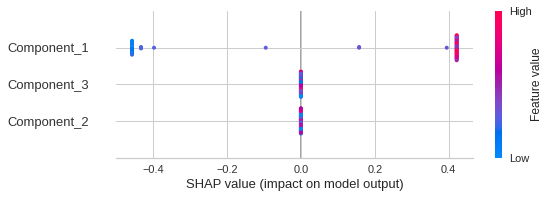

In [72]:
interpret_model(tuned_rf_pca, plot='summary')

**Visualize a single prediction**

In [73]:
interpret_model(tuned_rf_pca, plot='reason', observation=6)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**correlation plot**

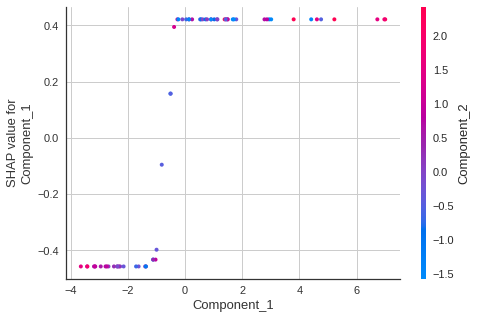

In [74]:
interpret_model(tuned_rf_pca, plot='correlation')

**Visualize many predictions**

In [75]:
interpret_model(tuned_rf_pca, plot='reason')